# Librerías

In [93]:
# system
import os

# Data manipulation
import cv2
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction algorithms from sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Logistic Regression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")

# 1. Simulate any random rectangular matrix A

In [94]:
A = np.random.rand(3,5)
A

array([[0.00300415, 0.65121915, 0.70117601, 0.30250743, 0.2437214 ],
       [0.87134151, 0.67677081, 0.32952912, 0.6650883 , 0.73474068],
       [0.76548827, 0.25529235, 0.20512558, 0.42490355, 0.72429514]])

In [95]:
# 1.1  What is the rank and trace of A?
print(f'The rank of A matrix is: ', np.linalg.matrix_rank(A))
print(f'The trace of A matrix is: ', np.trace(A))

The rank of A matrix is:  3
The trace of A matrix is:  0.8849005391462169


In [96]:
# 1.2 What is the determinant of A?
# print(f'The determinant of A matrix is: ', np.linalg.det(A))

print('LinAlgError: Last 2 dimensions of the array must be square')

LinAlgError: Last 2 dimensions of the array must be square


In [97]:
# 1.3 Can you invert A? How?

# print(f'The inverse of A matrix is: \n', np.linalg.inv(A))
A_inverse = np.linalg.pinv(A)
print(f'The pseudo-inverse of A matrix is: \n\n', A_inverse)

# inv: lineal no se puede porque no es cuadrada ni tiene determinante
# p: calcula una pseudoinversa con pérdida computacional

The pseudo-inverse of A matrix is: 

 [[-0.67226461  0.67558468  0.01224484]
 [-0.09430507  2.08442549 -2.34283503]
 [ 1.47779937 -1.91257334  1.84957211]
 [-0.32612396  1.27042697 -1.11671825]
 [ 0.51653365 -1.6523392   2.32479481]]


In [98]:
# Calculating A_T
A_T = np.transpose(A)
A_T

array([[0.00300415, 0.87134151, 0.76548827],
       [0.65121915, 0.67677081, 0.25529235],
       [0.70117601, 0.32952912, 0.20512558],
       [0.30250743, 0.6650883 , 0.42490355],
       [0.2437214 , 0.73474068, 0.72429514]])

In [99]:
# 1.4 How are eigenvalues and eigenvectors

# Eigen values and vector of AA_T
eigenvalues, eigenvectors = np.linalg.eig(A @ A_T)
print('The eigenvalues of A * A_T : \n', eigenvalues)
print('\n The eigenvectors of A * A_T : \n', eigenvectors)

The eigenvalues of A * A_T : 
 [4.11712511 0.62206797 0.03386097]

 The eigenvectors of A * A_T : 
 [[ 0.36990457  0.8977634   0.23914742]
 [ 0.74459329 -0.13251882 -0.65423207]
 [ 0.55565407 -0.420071    0.71748792]]


In [100]:
# 1.4 How are eigenvalues and eigenvectors

# Eigen values and vector of A_T*A
eigenvalues, eigenvectors = np.linalg.eig(A_T @ A)

print('The eigenvalues of A_T * A : \n', eigenvalues)
print('\n The eigenvalues of A_T * A : \n', eigenvectors)

The eigenvalues of A_T * A : 
 [4.11712511e+00 6.22067966e-01 3.38609746e-02 5.59578310e-16
 5.20712290e-17]

 The eigenvalues of A_T * A : 
 [[-0.52992403 -0.55068401 -0.10929924  0.59302096 -0.14883038]
 [-0.43697959  0.49157933 -0.56440748 -0.21214781 -0.47543686]
 [-0.30492405  0.63350564  0.53947691  0.45289791  0.15631737]
 [-0.41556898  0.00628077 -0.3147326  -0.09653264  0.82784602]
 [-0.51239936 -0.23179311  0.52858861 -0.62360595 -0.20504915]]


# 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.


In [101]:
# Análisis exploratorio de las imágenes
my_original_face = cv2.imread("melissa_ortega_color.jpeg")

# Definir parámetros
img_size = (my_original_face.shape[0], my_original_face.shape[1])

# Imprimir características de la imágen aleatoria
print(f"El tamaño de la figura es: {img_size} pixeles" )
print(f"La figuras es de tipo: {my_original_face.dtype}")
print(f"La figura tiene pixeles en el rango: {my_original_face.min()} - {my_original_face.max()}")

El tamaño de la figura es: (1000, 1000) pixeles
La figuras es de tipo: uint8
La figura tiene pixeles en el rango: 0 - 255


In [102]:
# Redimensionar la imagen
my_edited_face = cv2.cvtColor(my_original_face, cv2.COLOR_BGR2GRAY)
my_edited_face = cv2.resize(my_edited_face, (256, 256))
img_size_resize = (my_edited_face.shape[0], my_edited_face.shape[1])
print(f"\nEl nuevo tamaño de la figura es: {img_size_resize} pixeles" )


El nuevo tamaño de la figura es: (256, 256) pixeles


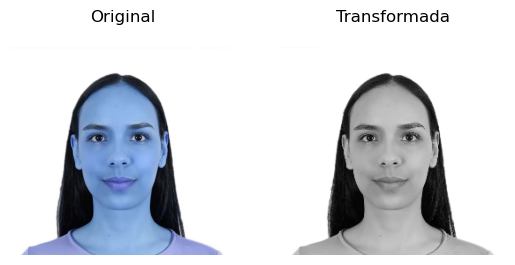

True

In [110]:
# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(my_original_face)
plt.title('Original')
plt.axis('off')

# Mostrar la imagen transformada
plt.subplot(1, 2, 2)
plt.imshow(my_edited_face, cmap='gray')
plt.title('Transformada')
plt.axis('off')

# Mostrar la figura
plt.show()

# Exportar la imágen
cv2.imwrite('melissa_ortega.jpg', my_edited_face)

In [104]:
# Obtener la lista de nombres de archivos en el directorio 'images'
images = os.listdir('Fotos ML2')
faces = []

# Leer las imágenes y redimensionarlas
for i in images:
    image_path = os.path.join('Fotos ML2', i)
    img = cv2.imread(image_path)

    if img is not None:
        img_resized = cv2.resize(img, (256, 256))  # Redimensionar a 256x256
        faces.append(img_resized)

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


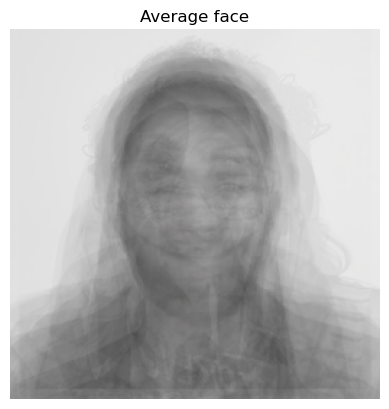

In [105]:
# Convertir la lista de imágenes a un array numpy
faces_array = np.array(faces)

# Calcular el promedio del rostro del grupo
average_face = np.mean(faces_array, axis=0)

# Mostrar la imagen promedio
plt.imshow(average_face.astype(np.uint8))
plt.title('Average face')
plt.axis('off') 
plt.show()

In [111]:
# Convertir la imagen promedio a un tipo de datos adecuado
average_face = np.uint8(average_face)

# Convertir la imagen promedio a escala de grises
average_face = cv2.cvtColor(average_face, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [112]:
# Calculate the squared differences between corresponding pixels
squared_diffs = (my_edited_face - average_face) ** 2

# Calculate the mean squared difference
mean_squared_diff = np.mean(squared_diffs)

# Calculate the root mean squared difference
root_mean_squared_diff = np.sqrt(mean_squared_diff)

print("Root mean squared difference:", root_mean_squared_diff)

Root mean squared difference: 10.97339047249819


La "diferencia cuadrática media" (Root Mean Squared Error, RMSE) entre dos imágenes es una medida de la diferencia promedio entre los valores de píxeles correspondientes en ambas imágenes.

Cuando se calcula la diferencia cuadrática entre dos imágenes, primero se calcula la diferencia entre los valores de píxeles correspondientes en cada posición, luego se eleva al cuadrado esta diferencia. Luego, se calcula la media de estas diferencias cuadráticas y se toma la raíz cuadrada de este valor para obtener el RMSE. El RMSE es una métrica comúnmente utilizada en problemas de regresión para evaluar la diferencia entre los valores predichos y los valores observados. En el contexto de imágenes, el RMSE puede proporcionar una medida cuantitativa de cuán diferentes son dos imágenes, teniendo en cuenta tanto la magnitud como la dirección de las diferencias entre los valores de píxeles. Un valor de RMSE más bajo indica que las dos imágenes son más similares entre sí, ya que hay menos diferencia entre los valores de píxeles correspondientes. Un valor de RMSE más alto indica que las dos imágenes son más diferentes entre sí, ya que hay una mayor diferencia entre los valores de píxeles correspondientes.

El rango de valores del RMSE depende del rango de valores de los píxeles en las imágenes que se están comparando. En general, el RMSE puede variar desde 0 hasta un valor máximo, donde un valor de 0 indica que las dos imágenes son idénticas y un valor más alto indica una mayor discrepancia entre las imágenes.

Otra forma de calcular la distancia entre dos imágenes es utilizando la diferencia absoluta entre los valores de píxeles de cada imagen y luego tomando la media de estas diferencias. Esto se conoce como la "diferencia absoluta media" (Mean Absolute Difference, MAD). Primero, calculamos la diferencia absoluta entre las dos imágenes utilizando np.abs(), que nos da una matriz de las diferencias absolutas de los valores de píxeles en cada posición. Luego, calculamos la media de estas diferencias utilizando np.mean() para obtener la diferencia absoluta media.

Esta es otra forma de medir la distancia entre dos imágenes, y puede ser útil en algunos casos, especialmente si estás interesado en la magnitud total de las diferencias entre las imágenes, independientemente de su dirección. Cuanto mayor sea el valor de la diferencia absoluta media, mayor será la discrepancia entre las imágenes. Por otro lado, una diferencia absoluta media más baja indica una mayor similitud entre las imágenes.

In [113]:

mad = np.mean(np.abs(my_edited_face - average_face))                # Diferencia absoluta media
manhattan_distance = np.sum(np.abs(my_edited_face - average_face))  # Distancia de Manhattan
euclidean_distance = np.linalg.norm(my_edited_face - average_face)  # Distancia euclidiana

print("Diferencia absoluta media:", mad)
print("Distancia euclidiana:", euclidean_distance)
print("Distancia de Manhattan:", manhattan_distance)

Diferencia absoluta media: 66.99626159667969
Distancia euclidiana: 21735.48216626445
Distancia de Manhattan: 4390667


La distancia de Manhattan entre dos imágenes es una medida de cuánto difieren las imágenes en términos de los valores de sus píxeles. Se calcula sumando las diferencias absolutas entre los valores de píxeles correspondientes en cada píxel de las imágenes. El resultado es una cantidad que indica la suma total de las diferencias en los valores de los píxeles entre las imágenes. No tiene un rango definido como la distancia euclidiana y su valor dependerá de la magnitud de las diferencias en los valores de píxeles entre las imágenes que se están comparando.

# 3. The unsupervised Python package

In [ ]:
# See unsupervised folder

PCA
https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py 
https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ipynb
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA 

TSNE
https://github.com/rushter/MLAlgorithms/blob/master/mla/tsne.py 

SVD
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html 

# 4. Apply SVD

In [216]:
from unsupervised.dim_red import svd

In [217]:
a = np.linalg.svd(my_edited_face)
a

(array([[-7.34322123e-02, -6.97835141e-02, -6.62868279e-02, ...,
          8.41376966e-03,  2.10205423e-01,  7.26294238e-01],
        [-7.34322123e-02, -6.97835141e-02, -6.62868279e-02, ...,
         -1.60877119e-02, -5.37026129e-01,  3.92759816e-01],
        [-7.34322123e-02, -6.97835141e-02, -6.62868279e-02, ...,
         -7.80090728e-03,  8.28539646e-02,  6.98907505e-03],
        ...,
        [-5.56554710e-02, -4.13568182e-02, -4.62261518e-02, ...,
          8.11850587e-16, -1.75623405e-14, -1.48318857e-14],
        [-5.56346378e-02, -4.20799947e-02, -4.67653925e-02, ...,
         -1.45716772e-15,  8.88178420e-15,  8.50708393e-15],
        [-5.56299441e-02, -4.31585734e-02, -4.66207303e-02, ...,
          4.19803081e-16,  1.31561428e-14,  1.13312137e-14]]),
 array([5.45454423e+04, 9.75837226e+03, 5.39341041e+03, 3.89718586e+03,
        3.50649533e+03, 2.75664248e+03, 2.67927540e+03, 1.59338929e+03,
        1.50915986e+03, 1.35841349e+03, 1.31956981e+03, 1.15698749e+03,
        1.012

In [218]:
# Using the SVD package
svd_instance = svd.SVD()

In [219]:
# Ajustar SVD a los datos
u, s, vt = svd_instance.fit(my_edited_face)

TypeError: cannot unpack non-iterable NoneType object

In [211]:
# Transformar tus datos usando los componentes Vt
transformed_data = svd_instance.transform(my_edited_face)
transformed_data

array([[-4.00539250e+03, -6.80973508e+02, -3.57512067e+02, ...,
         1.42108547e-14,  0.00000000e+00, -9.37916411e-13],
       [-4.00539250e+03, -6.80973508e+02, -3.57512067e+02, ...,
         1.42108547e-14,  0.00000000e+00, -9.37916411e-13],
       [-4.00539250e+03, -6.80973508e+02, -3.57512067e+02, ...,
         1.42108547e-14,  0.00000000e+00, -9.37916411e-13],
       ...,
       [-3.03575228e+03, -4.03575227e+02, -2.49316608e+02, ...,
        -1.42108547e-14, -1.06581410e-12, -2.84217094e-14],
       [-3.03461593e+03, -4.10632253e+02, -2.52224954e+02, ...,
        -1.42108547e-14, -4.68958206e-13, -3.41060513e-13],
       [-3.03435991e+03, -4.21157425e+02, -2.51444732e+02, ...,
        -1.42108547e-14, -9.94759830e-13, -2.84217094e-14]])

In [212]:
# Revertir la transformación si es necesario
original_data = svd_instance.inverse_transform(transformed_data)
original_data

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [220]:
# Número máximo de componentes
max_components = min(my_edited_face.shape)  # Tomamos el mínimo entre el ancho y la altura de la imagen

# Inicializar la lista para almacenar las imágenes reconstruidas
reconstructed_imgs = []

# Aplicar SVD progresivamente
for i in range(1, max_components + 1):
    # Crear una instancia de SVD con el número de componentes actual
    svd_instance = svd.SVD(n_components=i)

    # Ajustar SVD a la imagen
    U, S, Vt = svd_instance.fit(my_edited_face)

    # Reconstruir la imagen utilizando U, S y Vt
    reconstructed_img = svd_instance.transform(my_edited_face)

    # Almacenar la imagen reconstruida en la lista
    reconstructed_imgs.append(reconstructed_img)

    # Visualizar la imagen reconstruida
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f'Reconstructed Image (Components: {i})')
    plt.axis('off')
    plt.show()


TypeError: cannot unpack non-iterable NoneType object

Aplicar SVD (Descomposición en Valores Singulares) a una imagen implica descomponer la matriz de píxeles de la imagen en tres matrices: U, Σ y Vt, donde U y Vt contienen vectores singulares izquierdos y derechos, respectivamente, y Σ es una matriz diagonal que contiene los valores singulares. Progresivamente, al utilizar más valores singulares, podemos reconstruir la imagen con mayor precisión.

Para determinar el punto en el que la imagen se reproduce adecuadamente, podríamos visualizar la imagen reconstruida utilizando diferentes cantidades de valores singulares y compararla visualmente con la imagen original. Una vez que la imagen reconstruida sea visualmente similar a la imagen original, podríamos considerar que la imagen se ha reproducido adecuadamente.

Para cuantificar la diferencia entre la imagen original y la imagen reconstruida en cada paso, podríamos calcular una métrica de distancia, como la distancia euclidiana o la diferencia absoluta media, entre los píxeles de la imagen original y los píxeles de la imagen reconstruida. Cuanto menor sea la distancia, mayor será la similitud entre las dos imágenes.

Este código iterará sobre un rango de 1 al número máximo de componentes (valores singulares) disponibles en la imagen y visualizará las imágenes reconstruidas utilizando diferentes cantidades de valores singulares. Podrías observar cómo cambia la calidad de la reconstrucción a medida que se utilizan más valores singulares y determinar el punto en el que consideras que la imagen se reproduce adecuadamente. Además, podrías calcular una métrica de distancia entre la imagen original y cada imagen reconstruida para cuantificar la diferencia entre ellas.

# 5. Train a naive logistic regression on raw MNIST images

In [221]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convertir las etiquetas a binarias: 1 si es 8, 0 si es 0
y = np.where(y == '8', 1, 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9562857142857143


3 min 31 seg

Interpretability: Logistic regression models are highly interpretable. They provide coefficients for each feature (pixel in this case), which represent the influence of that feature on the prediction. Understanding these coefficients can give insights into which pixels are important for distinguishing between 0s and 8s.

Computational Efficiency: Logistic regression models are computationally efficient compared to more complex models like neural networks. Training a logistic regression model on raw MNIST images is relatively fast, making it suitable for quick experimentation and prototyping.

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# 6. Now, apply dimensionality reduction using all your algorithms

# 7.

In [ ]:
# Datos en conjuntos de entrenamiento y prueba
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

array([1, 0, 1, ..., 0, 0, 0])

In [225]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [226]:
# Perform dimensionality reduction with SVD
svd = TruncatedSVD(n_components=2)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

In [227]:
# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

Fit_transform en el conjunto de entrenamiento: Al llamar a fit_transform en el conjunto de entrenamiento, estamos ajustando la transformación (por ejemplo, aprendiendo los componentes principales en PCA) utilizando solo los datos de entrenamiento y luego aplicando esa transformación a los mismos datos. Esto asegura que la transformación esté optimizada para los datos de entrenamiento.

Transform en el conjunto de prueba: Sin embargo, al transformar el conjunto de prueba, solo queremos aplicar la transformación aprendida del conjunto de entrenamiento sin ajustar ningún parámetro. Por lo tanto, simplemente usamos la función transform sin el paso de ajuste (fit).

Esta separación entre fit_transform en el conjunto de entrenamiento y transform en el conjunto de prueba ayuda a evitar el sobreajuste y garantiza que la transformación se aplique de manera consistente a todos los datos, tanto de entrenamiento como de prueba.

In [ ]:
# Train a logistic regression model using the reduced datasets

#pca
logistic_regression.fit(X_pca_train, y_train)
y_pred_pca = logistic_regression.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [ ]:
# Train a logistic regression model using the reduced datasets

#svd
logistic_regression.fit(X_svd_train, y_train)
y_pred_svd = logistic_regression.predict(X_svd_test)
accuracy_svd = accuracy_score(y_test, y_pred_svd)

In [ ]:
# Train a logistic regression model using the reduced datasets

# tsne
logistic_regression.fit(X_tsne_train, y_train)
y_pred_tsne = logistic_regression.predict(X_tsne_test)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

In [ ]:
# Plot the 2 new features generated by each algorithm
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y)
plt.title('SVD')

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')

plt.show()

By plotting the 2 new features generated by each algorithm, you can visually inspect how the data is clustered or separated in the reduced feature space. Additionally, you can compare the performance of the model trained with the reduced datasets to the performance of the model trained with the original dataset to see if dimensionality reduction impacts the model's performance.

# 8

https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb